In [58]:
import openpyxl as xl
import pandas as pd

file_path = '/Users/meredithsmith/Desktop/TØPAnalysis/11GoodTØPTours.xlsx'
df= pd.read_excel(file_path)

In [59]:
df.head()

,Members,Associated Albums,Date,Tour,Unnamed: 4,City,State,Country,Continent,Venue,Suffix,Legs,Lineup,Signed Under,Unnamed: 14
0,"Tyler Joseph, Nick Thomas, Chris Salih",NaN,2009-07-08 00:00:00,NaN,NaN,Columbus,OH,USA,North America,Expresso Yourself Music Café,NaN,1.0,NaN,NaN,NaN
1,"Tyler Joseph, Nick Thomas, Chris Salih",NaN,2009-10-11 00:00:00,NaN,NaN,Columbus,OH,USA,North America,Battle of the Bands at the Alrosa Villa,NaN,1.0,NaN,NaN,NaN
2,"Tyler Joseph, Nick Thomas, Chris Salih",NaN,2009-12-29 00:00:00,NaN,NaN,Columbus,OH,USA,North America,The Basement,NaN,1.0,NaN,NaN,NaN
3,"Tyler Joseph, Nick Thomas, Chris Salih",Twenty Øne Pilots (Self-Titled),2010-01-16 00:00:00,NaN,NaN,Columbus,OH,USA,North America,Newport Music Hall,NaN,1.0,NaN,NaN,NaN
4,"Tyler Joseph, Nick Thomas, Chris Salih",Twenty Øne Pilots (Self-Titled),2010-02-19 00:00:00,NaN,NaN,Columbus,OH,USA,North America,Newport Music Hall,NaN,1.0,NaN,NaN,NaN


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1066 entries, 0 to 1065
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Members            1059 non-null   object 
 1   Associated Albums  1053 non-null   object 
 2   Date               1066 non-null   object 
 3   Tour               762 non-null    object 
 4   Unnamed: 4         0 non-null      float64
 5   City               1038 non-null   object 
 6   State              747 non-null    object 
 7   Country            1043 non-null   object 
 8   Continent          1044 non-null   object 
 9   Venue              1057 non-null   object 
 10  Suffix             85 non-null     object 
 11  Legs               1042 non-null   float64
 12  Lineup             36 non-null     object 
 13  Signed Under       43 non-null     object 
 14  Unnamed: 14        16 non-null     object 
dtypes: float64(2), object(13)
memory usage: 125.1+ KB


https://www.geeksforgeeks.org/data-analysis/data-cleansing-introduction/

#### Identify Column Data Types

In [61]:
cat_col = [col for col in df.columns if df[col].dtype == 'object']
num_col = [col for col in df.columns if df[col].dtype != 'object']

print('Categorical columns:', cat_col)
print('Numerical columns:', num_col)

Categorical columns: ['Members', 'Associated Albums', 'Date', 'Tour', 'City ', 'State', 'Country', 'Continent', 'Venue', 'Suffix', 'Lineup', 'Signed Under', 'Unnamed: 14']
Numerical columns: ['Unnamed: 4', 'Legs']


#### Count Unique Values

In [62]:
df[cat_col].nunique()

Members                 2
Associated Albums       8
Date                 1025
Tour                   97
City                  448
State                  55
Country                67
Continent               9
Venue                 855
Suffix                  8
Lineup                 22
Signed Under            2
Unnamed: 14            15
dtype: int64

#### Calculate Missing Values as Percentage

In [63]:
round((df.isnull().sum() / df.shape[0]) * 100, 2)

Members                0.66
Associated Albums      1.22
Date                   0.00
Tour                  28.52
Unnamed: 4           100.00
City                   2.63
State                 29.92
Country                2.16
Continent              2.06
Venue                  0.84
Suffix                92.03
Legs                   2.25
Lineup                96.62
Signed Under          95.97
Unnamed: 14           98.50
dtype: float64

### Drop Irrelevant or Data - Heavy Missing Columns

In [64]:
df1 = df.drop(columns=['Unnamed: 4', 'Suffix', 'Lineup', 'Signed Under', 'Unnamed: 14'])


In [65]:
df1.dtypes

Members               object
Associated Albums     object
Date                  object
Tour                  object
City                  object
State                 object
Country               object
Continent             object
Venue                 object
Legs                 float64
dtype: object

In [66]:
df1.columns = df1.columns.str.strip()

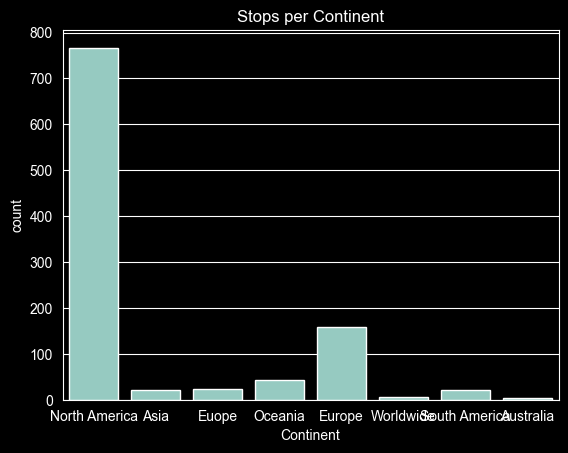

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# Strip leading/trailing whitespace and tabs from the continent column
df1['Continent'] = df1['Continent'].str.strip()

# Now plot again
sns.countplot(data=df1, x='Continent')
plt.title('Stops per Continent')
plt.show()

In [68]:
import pandas as pd

# Grouping by continent and summing the population
continent_stats = df1.groupby('Continent')['Legs'].sum().reset_index()

print(continent_stats)

       Continent   Legs
0           Asia   21.0
1      Australia    4.0
2          Euope   24.0
3         Europe  158.0
4  North America  764.0
5        Oceania   43.0
6  South America   21.0
7      Worldwide    6.0


              Country   Legs
0      Allianz Parque    1.0
1           Argentina    5.0
2           Australia   40.0
3             Austria    7.0
4             Belgium   10.0
5              Brazil    5.0
6              Canada   35.0
7               Chile    4.0
8               China    2.0
9            Colombia    3.0
10     Czech Republic    4.0
11            Denmark    3.0
12            England    5.0
13      Farmasi Arena    1.0
14            Finland    2.0
15             France   15.0
16            Germany   25.0
17            Hungary    1.0
18            Ireland    4.0
19              Italy    7.0
20              Japan   10.0
21              Korea    2.0
22             Latvia    1.0
23             Mexico   15.0
24        Netherlands   12.0
25        New Zealand    7.0
26             Norway    4.0
27           Paraguay    2.0
28        Philippines    2.0
29             Poland    3.0
30           Portugal    1.0
31  Republic of Korea    1.0
32             Russia    4.0
33           S

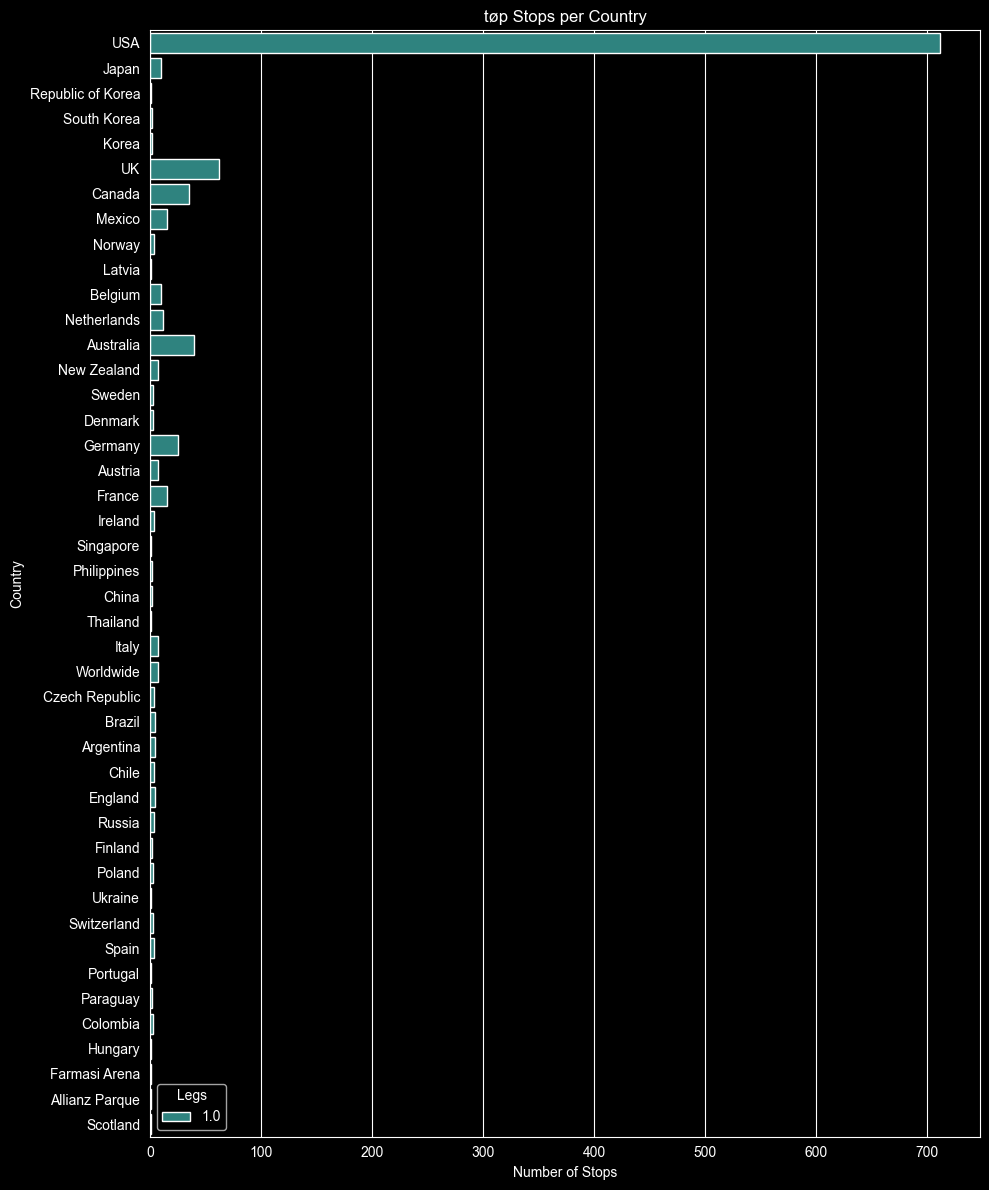

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

df1['Country'] = df1['Country'].str.strip()
# Grouping by continent and summing the population
country_stats = df1.groupby('Country')['Legs'].sum().reset_index()

print(country_stats)

# Set the figure size so the country names aren't squashed
plt.figure(figsize=(10, 12))

# Use countplot to actually count occurrences of each country
sns.countplot(data=df1, y="Country", hue = 'Legs', palette="viridis")

plt.title('tøp Stops per Country')
plt.xlabel('Number of Stops')
plt.ylabel('Country')

# Optional: Adjust layout to prevent clipping of labels
plt.tight_layout()
plt.show()

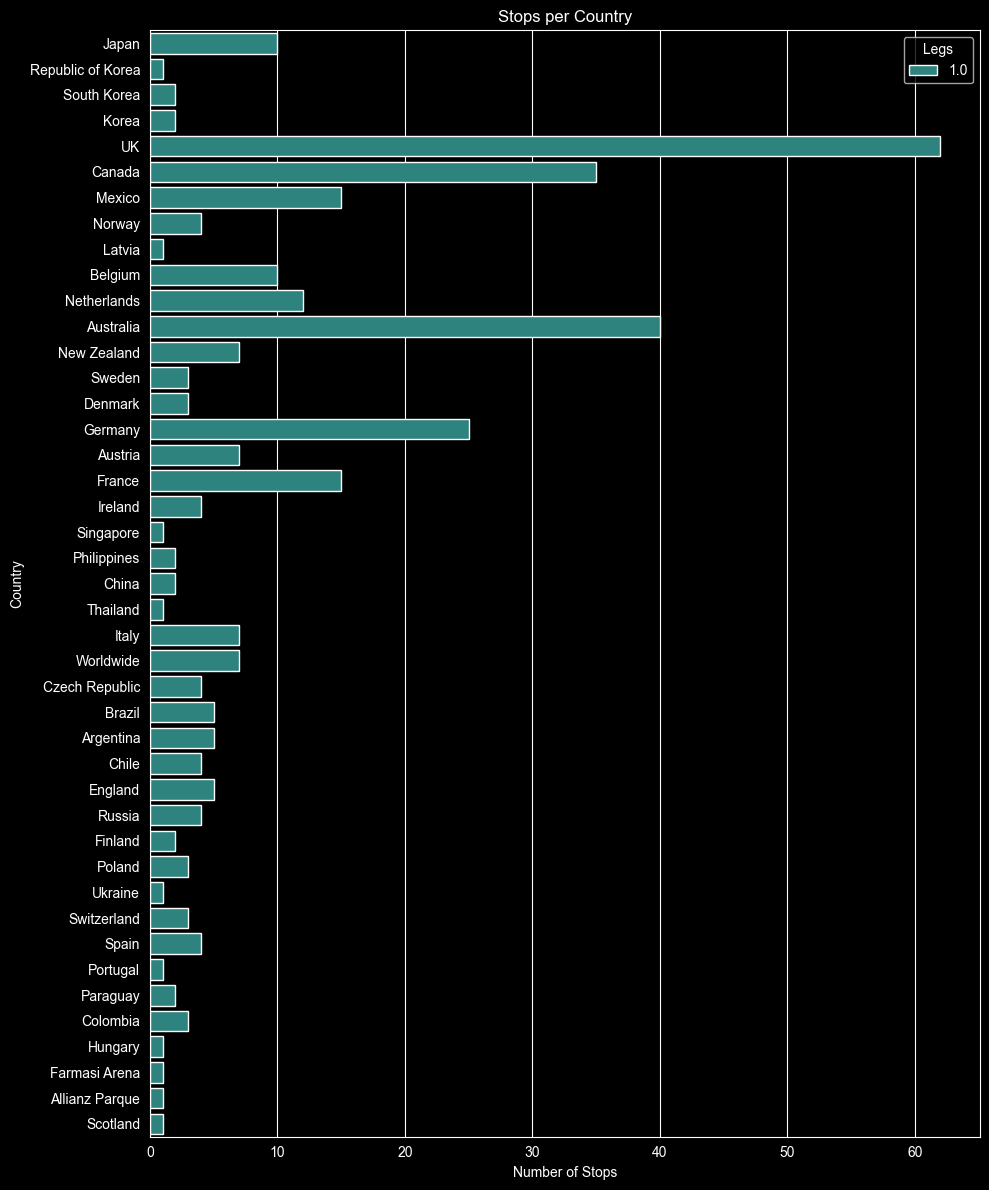

In [70]:
# Filter out a specific country
df_filtered = df1[df1['Country'] != 'USA']

# Set the figure size so the country names aren't squashed
plt.figure(figsize=(10, 12))

# Use countplot to actually count occurrences of each country
sns.countplot(data=df_filtered, y="Country", hue ='Legs', palette="viridis")

plt.title('tøp Stops per Country')
plt.xlabel('Number of Stops')
plt.ylabel('Country')

# Optional: Adjust layout to prevent clipping of labels
plt.tight_layout()
plt.show()

In [71]:
# Use .copy() to create a dedicated DataFrame
df_usa = df1[df1['Country'] == 'USA'].copy()

# Now this operation will not trigger a warning
df_usa['State'] = df_usa['State'].str.strip()

In [72]:
import nbformat as nbf
import plotly.express as px
import ipywidgets as widgets

# Count the occurrences of each state
state_counts = df_usa['State'].value_counts().reset_index()
state_counts.columns = ['State', 'Count']

# Create an interactive map
fig = px.choropleth(state_counts,
                    locations='State',
                    locationmode="USA-states",
                    color='Count',
                    scope="usa",
                    title='tøp Tour Stop Counts by State')
fig.show()

In [94]:
import nbformat as nbf
import plotly.express as px
import ipywidgets as widgets

# Count the occurrences of each state
country_counts = df_filtered['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'CCount']

# Create an interactive map
fig = px.choropleth(country_counts,
                    locations='Country',
                    locationmode='country names',
                    color='CCount',






                    title='tøp Tour Stop Counts by Country')
fig.show()

/var/folders/b3/c2r9247s37z1czpqz37hrcd40000gn/T/ipykernel_48627/3018494729.py:10: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.

